## Introduction
In this notebook, we will try to analyze Iowa Liquor Dataset. It describes the sales report of liquor transaction in Iowa State, USA. 
It is an open source dataset that can be found in [here](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales).

### Prepare the Data

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the Data

In [3]:
df = pd.read_csv('gdrive/MyDrive/bq-results-20210215-184221-bfjklnmmecr9/iowa_liquor_sample10%.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-30719000047,2020-10-02,4346,Roy's Foodland,105 Pearl St,Shellsburg,52332,POINT (-91.869285 42.094155),6.0,BENTON,1081100.0,Coffee Liqueurs,370.0,PERNOD RICARD USA,67527,Kahlua Coffee,12,1000,15.15,22.73,2,45.46,2.0,0.52
1,S14664600002,2013-09-24,3420,Sam's Club 6344 / Windsor Heights,1101 73RD STREET,WINDSOR HEIGHTS,50311,POINT (-93.718027 41.599172),77.0,Polk,1081030.0,COFFEE LIQUEURS,65.0,Jim Beam Brands,67557,Kamora Coffee Liqueur,12,1000,8.13,12.20,108,1317.60,108.0,28.53
2,INV-20333100072,2019-07-01,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001,POINT (-90.668138 42.504959),31.0,DUBUQUE,1041300.0,American Sloe Gins,434.0,LUXCO INC,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.0,0.52
3,S15692300040,2013-11-13,3932,Main Street Spirits / Mapleton,311 MAIN ST,MAPLETON,51034,POINT (-95.79375 42.165915),67.0,Monona,1051110.0,BLACKBERRY BRANDIES,434.0,Luxco-St Louis,55087,Paramount Blackberry Brandy,12,1000,6.53,9.80,4,39.20,4.0,1.06
4,INV-23258300048,2019-11-16,3678,"Smoke Shop, The",1918 SE 14th St,Des Moines,50320,POINT (-93.597011 41.570844),77.0,POLK,1062100.0,Gold Rum,35.0,BACARDI USA INC,43031,Bacardi Gold Mini,12,50,5.54,8.31,12,99.72,0.6,0.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055819 entries, 0 to 2055818
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   county_number            float64
 9   county                   object 
 10  category                 float64
 11  category_name            object 
 12  vendor_number            float64
 13  vendor_name              object 
 14  item_number              object 
 15  item_description         object 
 16  pack                     int64  
 17  bottle_volume_ml         int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             int64  
 21  sale_dol

### Convert item_number column type to int64

In [ ]:
col_dtypes = dict([(k, v.name) for k, v in dict(df.dtypes).items()])
print(col_dtypes)

{'invoice_and_item_number': 'object', 'date': 'object', 'store_number': 'int64', 'store_name': 'object', 'address': 'object', 'city': 'object', 'zip_code': 'object', 'store_location': 'object', 'county_number': 'float64', 'county': 'object', 'category': 'float64', 'category_name': 'object', 'vendor_number': 'float64', 'vendor_name': 'object', 'item_number': 'object', 'item_description': 'object', 'pack': 'int64', 'bottle_volume_ml': 'int64', 'state_bottle_cost': 'float64', 'state_bottle_retail': 'float64', 'bottles_sold': 'int64', 'sale_dollars': 'float64', 'volume_sold_liters': 'float64', 'volume_sold_gallons': 'float64'}


In [ ]:
col_dtypes = {
    'invoice_and_item_number': 'object', 'date': 'object', 'store_number': 'int64', 
    'store_name': 'object', 'address': 'object', 'city': 'object', 'zip_code': 'object', 
    'store_location': 'object', 'county_number': 'float64', 'county': 'object', 'category': 'float64', 
    'category_name': 'object', 'vendor_number': 'float64', 'vendor_name': 'object', 'item_number': 'int64', 
    'item_description': 'object', 'pack': 'int64', 'bottle_volume_ml': 'int64', 'state_bottle_cost': 'float64', 
    'state_bottle_retail': 'float64', 'bottles_sold': 'int64', 'sale_dollars': 'float64', 
    'volume_sold_liters': 'float64', 'volume_sold_gallons': 'float64'
}

In [ ]:
def clean_non_numeric_values(series, col_type):
    illegal_value_pos = []
    for i in range(len(series)):
        try:
            if col_type == 'int64' or col_type == 'int32':
                val = int(series[i])
            elif col_type == 'float32' or col_type == 'float64':
                val = float(series[i])
        except:
            illegal_value_pos.append(i)
            
    return series, illegal_value_pos

Check if there are some weird values

In [ ]:
for col in list(df.columns):
    if col_dtypes[col] in ['int32', 'int64', 'float32', 'float64']:
        series, illegal_value_pos = (
            clean_non_numeric_values(series=df[col], col_type=col_dtypes[col])
        )
        df[col] = series
        print(illegal_value_pos)
        if illegal_value_pos:
            illegal_rows = df.iloc[illegal_value_pos]
            # This will print all the illegal values.
            print(illegal_rows[col])

[]
[]
[]
[]
[231927]
231927    x904631
Name: item_number, dtype: object
[]
[]
[]
[]
[]
[]
[]
[]


In [ ]:
df.iloc[231927]

invoice_and_item_number                         INV-04204800002
date                                                 2017-04-06
store_number                                               4988
store_name                               Happy's Wine & Spirits
address                                     5925 University Ave
city                                                Cedar Falls
zip_code                                                  50613
store_location                     POINT (-92.429331 42.512766)
county_number                                              7.00
county                                               BLACK HAWK
category                                             1901200.00
category_name                               Special Order Items
vendor_number                                            260.00
vendor_name                                     DIAGEO AMERICAS
item_number                                             x904631
item_description           Tanqueray Gin

Replace the weird value, and then convert the column's type to int64

In [5]:
df['item_number']=df['item_number'].replace('x904631','904631')

In [6]:
df['item_number'] = df['item_number'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055819 entries, 0 to 2055818
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   county_number            float64
 9   county                   object 
 10  category                 float64
 11  category_name            object 
 12  vendor_number            float64
 13  vendor_name              object 
 14  item_number              int32  
 15  item_description         object 
 16  pack                     int64  
 17  bottle_volume_ml         int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             int64  
 21  sale_dol

### Format fixing

In [7]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
address                      7894
city                         7894
zip_code                     7895
store_location             197414
county_number               15584
county                      15584
category                     1679
category_name                2497
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

In [8]:
df['store_location'].value_counts()

POINT (-93.596754 41.554101)            17311
POINT (-93.613739 41.60572)             14317
POINT (-93.619787 41.60566)             13810
POINT (-91.53046300000001 41.642764)    12424
POINT (-92.435236 42.512789)            10752
                                        ...  
POINT (-93.736835 41.629429)                1
POINT (-93.596913 41.55604)                 1
POINT (-93.645606 41.604077)                1
POINT (-91.657883 42.035276)                1
POINT (-95.533015 42.428294)                1
Name: store_location, Length: 1997, dtype: int64

In [9]:
df['zip_code'].value_counts()

50010    50474
52402    49209
52240    46620
50613    38117
50317    36329
         ...  
50471       20
52134       17
52362       12
50336        6
51230        2
Name: zip_code, Length: 490, dtype: int64

In [10]:
df[df['address']=='3800 W LINCOLN WAY']

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
63,S23984200183,2015-02-11,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1081335.0,RASPBERRY SCHNAPPS,434.0,Luxco-St Louis,82147,Arrow Raspberry Schnapps,12,1000,5.00,7.50,4,30.00,4.00,1.06
896,S10378500099,2013-02-04,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1041150.0,FLAVORED GINS,370.0,Pernod Ricard USA/Austin Nichols,33266,Seagram's Orange Twisted Gin,12,750,5.99,8.99,12,107.88,9.00,2.38
1015,S20527700017,2014-08-06,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1101100.0,AMERICAN ALCOHOL,434.0,Luxco-St Louis,41846,Everclear Alcohol,12,750,9.00,13.50,12,162.00,9.00,2.38
1259,S24462700114,2015-03-11,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1101100.0,AMERICAN ALCOHOL,434.0,Luxco-St Louis,41846,Everclear Alcohol,12,750,9.00,13.50,12,162.00,9.00,2.38
1311,S07755500009,2012-09-17,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1081317.0,GRAPE SCHNAPPS,65.0,Jim Beam Brands,82636,Dekuyper Grape Pucker Schnapps,12,750,6.30,9.45,12,113.40,9.00,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055339,S17746300167,2014-03-05,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,338.0,Niche Import Co.,64356,Barenjager Imp Honey Liqueur,6,750,14.92,22.38,2,44.76,1.50,0.40
2055405,S21651500185,2014-10-08,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,389.0,REMY COINTREAU USA .,64776,Cointreau Liqueur,12,750,19.99,29.99,2,59.98,1.50,0.40
2055513,S12824700086,2013-06-14,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,461.0,Campari(skyy),64996,Frangelico Liqueur,12,750,13.01,19.52,2,39.04,1.50,0.40
2055721,S31644600242,2016-04-06,2500,Hy-Vee Food Store #1 / Ames,3800 W LINCOLN WAY,AMES,50010,NaN,85.0,Story,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192.0,Sidney Frank Importing Co.,65254,Jagermeister Liqueur,24,375,6.52,9.78,6,58.68,2.25,0.59


**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [11]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-30719000047,2020-10-02,4346,Roy's Foodland,105 Pearl St,Shellsburg,52332,POINT (-91.869285 42.094155),6.0,BENTON,1081100.0,Coffee Liqueurs,370.0,PERNOD RICARD USA,67527,Kahlua Coffee,12,1000,15.15,22.73,2,45.46,2.0,0.52
1,S14664600002,2013-09-24,3420,Sam's Club 6344 / Windsor Heights,1101 73RD STREET,WINDSOR HEIGHTS,50311,POINT (-93.718027 41.599172),77.0,Polk,1081030.0,COFFEE LIQUEURS,65.0,Jim Beam Brands,67557,Kamora Coffee Liqueur,12,1000,8.13,12.20,108,1317.60,108.0,28.53
2,INV-20333100072,2019-07-01,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001,POINT (-90.668138 42.504959),31.0,DUBUQUE,1041300.0,American Sloe Gins,434.0,LUXCO INC,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.0,0.52
3,S15692300040,2013-11-13,3932,Main Street Spirits / Mapleton,311 MAIN ST,MAPLETON,51034,POINT (-95.79375 42.165915),67.0,Monona,1051110.0,BLACKBERRY BRANDIES,434.0,Luxco-St Louis,55087,Paramount Blackberry Brandy,12,1000,6.53,9.80,4,39.20,4.0,1.06
4,INV-23258300048,2019-11-16,3678,"Smoke Shop, The",1918 SE 14th St,Des Moines,50320,POINT (-93.597011 41.570844),77.0,POLK,1062100.0,Gold Rum,35.0,BACARDI USA INC,43031,Bacardi Gold Mini,12,50,5.54,8.31,12,99.72,0.6,0.15


In [12]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
address                      7894
city                         7894
zip_code                     7895
store_location             197414
county_number               15584
county                      15584
category                     1679
category_name                2497
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

In [13]:
df['city'].value_counts()

Des Moines      97148
DES MOINES      81234
Cedar Rapids    74129
CEDAR RAPIDS    59757
Davenport       48110
                ...  
GILBERTVILLE        7
Colesburg           6
RUNNELLS            5
ROBINS              4
ALVORD              2
Name: city, Length: 837, dtype: int64

In [14]:
df['category_name'].value_counts()

American Vodkas                    159091
VODKA 80 PROOF                     126867
Canadian Whiskies                  104655
CANADIAN WHISKIES                   94078
Straight Bourbon Whiskies           67758
                                    ...  
Delisted Items                          7
Holiday VAP                             4
HIGH PROOF BEER - AMERICAN              4
Temporary  & Specialty Packages         2
IMPORTED VODKA - CHERRY                 1
Name: category_name, Length: 130, dtype: int64

In [15]:
df['vendor_name'].value_counts()

Jim Beam Brands              193548
DIAGEO AMERICAS              178013
Diageo Americas              169407
Luxco-St Louis               104632
Heaven Hill Brands            94460
                              ...  
Global Beverage Team, LLC         1
Ransom Spirits LLC                1
SWISS CELLARS                     1
HAAS BROTHERS                     1
Seashore Marketing Group          1
Name: vendor_name, Length: 381, dtype: int64

In [16]:
df['store_name'].value_counts()

Hy-Vee #3 / BDI / Des Moines           17311
Central City 2                         14317
Central City Liquor, Inc.              13810
Hy-Vee Wine and Spirits / Iowa City    12424
Hy-Vee Food Store / Cedar Falls        10752
                                       ...  
Lonely Oak Distilery                       1
Forest Market Convenience                  1
Iowa Legendary Rye                         1
Paradise Distilling Company                1
A&S Food and Gas / Davenport               1
Name: store_name, Length: 2671, dtype: int64

It seems that there are values that actually have the same meaning, but it counts as separate values because of the difference in typing. So, we will need to make it the same by lowering the strings.

Convert all strings in a column to lower case without removing the NaN

In [17]:
df['city']=df['city'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [18]:
df['county']=df['county'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [19]:
df['category_name']=df['category_name'].map(lambda x: x.lower() if isinstance(x,str) else x)

In [20]:
df['vendor_name']=df['vendor_name'].map(lambda x: x.lower() if isinstance(x,str) else x)

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Remove address column, because it can be represented with the store_name column**

In [21]:
df['address'].value_counts()

1460 2ND AVE             13694
3221 SE 14th St          12607
3221 SE 14TH ST          11042
1501 Michigan Ave         8104
6301 University           7244
                         ...  
5520 190th St.               1
245, Railroad Ave            1
1833 Elmwood Rd.             1
314, Prairie View Dr.        1
2508 N Court St              1
Name: address, Length: 3736, dtype: int64

In [22]:
df=df.drop('address', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055819 entries, 0 to 2055818
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   city                     object 
 5   zip_code                 object 
 6   store_location           object 
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

In [24]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                         7894
zip_code                     7895
store_location             197414
county_number               15584
county                      15584
category                     1679
category_name                2497
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

Convert date column into datetime type

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055819 entries, 0 to 2055818
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   city                     object        
 5   zip_code                 object        
 6   store_location           object        
 7   county_number            float64       
 8   county                   object        
 9   category                 float64       
 10  category_name            object        
 11  vendor_number            float64       
 12  vendor_name              object        
 13  item_number              int64         
 14  item_description         object        
 15  pack                     int64         
 16  bottle_volume_ml         int64         
 17  state_bottle_cost        fl

In [27]:
df['date'].head()

0   2020-10-02
1   2013-09-24
2   2019-07-01
3   2013-11-13
4   2019-11-16
Name: date, dtype: datetime64[ns]

Create column date with only month and year, and also year values.

In [28]:
import datetime

In [29]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [30]:
df['month_year'] = df['date'].dt.to_period('M')

In [31]:
df

,invoice_and_item_number,date,store_number,store_name,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
0,INV-30719000047,2020-10-02,4346,Roy's Foodland,shellsburg,52332,POINT (-91.869285 42.094155),6.0,benton,1081100.0,coffee liqueurs,370.0,pernod ricard usa,67527,Kahlua Coffee,12,1000,15.15,22.73,2,45.46,2.0,0.52,2020,2020-10
1,S14664600002,2013-09-24,3420,Sam's Club 6344 / Windsor Heights,windsor heights,50311,POINT (-93.718027 41.599172),77.0,polk,1081030.0,coffee liqueurs,65.0,jim beam brands,67557,Kamora Coffee Liqueur,12,1000,8.13,12.20,108,1317.60,108.0,28.53,2013,2013-09
2,INV-20333100072,2019-07-01,4167,"Iowa Street Market, Inc.",dubuque,52001,POINT (-90.668138 42.504959),31.0,dubuque,1041300.0,american sloe gins,434.0,luxco inc,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.0,0.52,2019,2019-07
3,S15692300040,2013-11-13,3932,Main Street Spirits / Mapleton,mapleton,51034,POINT (-95.79375 42.165915),67.0,monona,1051110.0,blackberry brandies,434.0,luxco-st louis,55087,Paramount Blackberry Brandy,12,1000,6.53,9.80,4,39.20,4.0,1.06,2013,2013-11
4,INV-23258300048,2019-11-16,3678,"Smoke Shop, The",des moines,50320,POINT (-93.597011 41.570844),77.0,polk,1062100.0,gold rum,35.0,bacardi usa inc,43031,Bacardi Gold Mini,12,50,5.54,8.31,12,99.72,0.6,0.15,2019,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055814,S04770500010,2012-03-28,2653,Hy-Vee Wine and Spirits / Washington,washington,52353,POINT (-91.704567 41.296576),92.0,washington,1082900.0,misc. imported cordials & liqueurs,192.0,sidney frank importing co.,65257,Jagermeister Liqueur,12,1000,14.93,22.39,2,44.78,2.0,0.53,2012,2012-03
2055815,S28349700036,2015-10-07,3785,Southside Tobacco and Liquor,des moines,50315,POINT (-93.624729 41.56373),77.0,polk,1082900.0,misc. imported cordials & liqueurs,192.0,sidney frank importing co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,2,46.62,2.0,0.53,2015,2015-10
2055816,S20150400038,2014-07-16,3717,The Liquor Stop / Sumner,sumner,50674,POINT (-92.09922100000001 42.847479),9.0,bremer,1082900.0,misc. imported cordials & liqueurs,192.0,sidney frank importing co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,2,46.62,2.0,0.53,2014,2014-07
2055817,S16278100032,2013-12-16,3488,Bender's Foods,bellevue,52031,POINT (-90.42292 42.255449),49.0,jackson,1082900.0,misc. imported cordials & liqueurs,461.0,campari(skyy),67194,X Rated Fusion Liqueur,6,1000,18.67,28.00,2,56.00,2.0,0.53,2013,2013-12


**---------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Handling with Missing Values

In [32]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                         7894
zip_code                     7895
store_location             197414
county_number               15584
county                      15584
category                     1679
category_name                2497
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
year                            0
month_year                      0
dtype: int64

Fillna in city column with its mode

In [33]:
df['city'] = df['city'].fillna(df['city'].mode()[0])

Fillna in county column based on mode grouped by city column (because city is in a county)

In [34]:
df['county'] = df.groupby('city')['county'].apply(
    lambda x: x.fillna(x.mode()[0])
)

Drop zip_code column, because it represents the city

In [35]:
df=df.drop('zip_code', axis=1)

Drop county_number column, because it represents the same thing as county column

In [36]:
df['county_number']

0           6.0
1          77.0
2          31.0
3          67.0
4          77.0
           ... 
2055814    92.0
2055815    77.0
2055816     9.0
2055817    49.0
2055818    77.0
Name: county_number, Length: 2055819, dtype: float64

In [37]:
df=df.drop('county_number', axis=1)

In [38]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                            0
store_location             197414
county                          0
category                     1679
category_name                2497
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
year                            0
month_year                      0
dtype: int64

In [39]:
df.isnull().sum()*100/len(df)

invoice_and_item_number    0.000000
date                       0.000000
store_number               0.000000
store_name                 0.000000
city                       0.000000
store_location             9.602694
county                     0.000000
category                   0.081671
category_name              0.121460
vendor_number              0.000049
vendor_name                0.000049
item_number                0.000000
item_description           0.000000
pack                       0.000000
bottle_volume_ml           0.000000
state_bottle_cost          0.000049
state_bottle_retail        0.000049
bottles_sold               0.000000
sale_dollars               0.000049
volume_sold_liters         0.000000
volume_sold_gallons        0.000000
year                       0.000000
month_year                 0.000000
dtype: float64

Fillna in category column with its mode

In [40]:
df['category'] = df['category'].fillna(df['category'].mode()[0])

Fillna in category_name column based on mode grouped by category column (because category represents category_name)

In [41]:
df[(df.isnull()['category_name']==True) & (df.isnull()['category']==False) ]

,invoice_and_item_number,date,store_number,store_name,city,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
47,S27841100003,2015-10-12,2527,Hy-Vee Food Store #5 / Des Moines,des moines,POINT (-93.602372 41.526289),polk,1012100.0,NaN,259.0,heaven hill brands,59100,Evan Williams Egg Nog,12,750,4.46,6.69,36,240.84,27.0,7.13,2015,2015-10
81,INV-17495900121,2019-02-12,4167,"Iowa Street Market, Inc.",dubuque,POINT (-90.668138 42.504959),dubuque,1012100.0,NaN,55.0,sazerac north america,84197,99 Pineapple Mini,10,600,6.00,9.00,2,18.00,1.2,0.31,2019,2019-02
119,INV-17155700110,2019-01-25,3963,Tobacco Hut #14 / Council Bluffs,council bluffs,POINT (-95.873073 41.261866),pottawatta,1012100.0,NaN,55.0,sazerac north america,84197,99 Pineapple Mini,10,600,6.00,9.00,3,27.00,1.8,0.47,2019,2019-01
160,INV-08892400002,2017-11-29,5401,Clinton Gas & Mart,clinton,POINT (-90.193204 41.838281),clinton,1012100.0,NaN,421.0,sazerac company inc,100015,Fireball Bag in Box,3,3500,30.00,45.00,2,90.00,7.0,1.85,2017,2017-11
179,INV-18117200001,2019-03-13,5086,"Central Mart I, LLC.",sioux city,POINT (-96.385071 42.515989),woodbury,1012100.0,NaN,55.0,sazerac north america,84197,99 Pineapple Mini,10,600,6.00,9.00,2,18.00,1.2,0.31,2019,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838973,INV-17116000029,2019-01-24,2515,Hy-Vee Food Store #1 / Mason City,mason city,POINT (-93.23551 43.149557),cerro gord,1012100.0,NaN,305.0,mhw ltd,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.5,0.39,2019,2019-01
1839003,INV-26642600088,2020-04-17,5236,"Giggle Juice Liquor Station, LLC",anamosa,POINT (-91.29083400000002 42.108203),jones,1012100.0,NaN,305.0,mhw ltd,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.5,0.39,2020,2020-04
1839228,INV-24559100059,2020-01-14,5527,Liquor Downtown,iowa city,POINT (-91.530181 41.657654),johnson,1012100.0,NaN,305.0,mhw ltd,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.5,0.39,2020,2020-01
1839293,INV-26430400039,2020-04-10,2190,"Central City Liquor, Inc.",des moines,POINT (-93.619787 41.60566),polk,1012100.0,NaN,305.0,mhw ltd,80024,Blue Chair Bay Banana Rum Cream,12,750,9.42,14.13,2,28.26,1.5,0.39,2020,2020-04


In [42]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                            0
store_location             197414
county                          0
category                        0
category_name                2497
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
year                            0
month_year                      0
dtype: int64

In [43]:
df['category_name'] = df.groupby('category')['category_name'].apply(
    lambda x: x.fillna(x.mode(dropna=False)[0])
)

In [44]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                            0
store_location             197414
county                          0
category                        0
category_name                   2
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
year                            0
month_year                      0
dtype: int64

In [45]:
df[df.isnull()['category_name']==True]

,invoice_and_item_number,date,store_number,store_name,city,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
1189884,S33576300004,2016-07-27,3869,Bootleggin' Barzini's Fin,coralville,POINT (-91.565517 41.672672),johnson,1062250.0,NaN,259.0,heaven hill brands,902469,Whaler's Original Dark Rum,12,750,7.42,11.13,12,133.56,9.0,2.38,2016,2016-07
1826552,S12426000012,2013-05-29,3869,Bootleggin' Barzini's Fin,coralville,POINT (-91.565517 41.672672),johnson,1062250.0,NaN,259.0,heaven hill brands,902469,Whaler's Original Dark Rum,12,750,6.93,10.40,12,124.80,9.0,2.38,2013,2013-05


There are one category that has null value, which is 1062250.0
It's better to remove the observations, because there are no information on the internet about that.

In [46]:
df = df.dropna(subset=['category_name'])

In [47]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                            0
store_location             197414
county                          0
category                        0
category_name                   0
vendor_number                   1
vendor_name                     1
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               1
state_bottle_retail             1
bottles_sold                    0
sale_dollars                    1
volume_sold_liters              0
volume_sold_gallons             0
year                            0
month_year                      0
dtype: int64

Fillna in vendor_number and vendor_name columns to the ones that has item_description of 'Monte Alban Reposado' (It is the same vendor based on [sazerac official website](https://www.sazerac.com/our-brands/sazerac-brands/monte-alban.html).

In [48]:
df[df.isnull()['vendor_number']==True]

,invoice_and_item_number,date,store_number,store_name,city,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
1146254,INV-33728600005,2021-01-25,2633,Hy-Vee #3 / BDI / Des Moines,des moines,POINT (-93.596754 41.554101),polk,1022200.0,100% agave tequila,NaN,NaN,988100,Monte Alban Silver,12,750,12.98,15.56,12,186.72,9.0,2.37,2021,2021-01


In [49]:
df[df['item_description']=='Monte Alban Reposado'].head()

,invoice_and_item_number,date,store_number,store_name,city,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
15721,S10648700054,2013-02-18,2353,Cresco Liquor Store,cresco,POINT (-92.106529 43.371131),howard,1022100.0,tequila,55.0,sazerac north america,89568,Monte Alban Reposado,12,750,9.87,14.81,4,59.24,3.00,0.79,2013,2013-02
129317,S14367300066,2013-09-05,4169,Super Quick 2 / Hubbell,des moines,NaN,polk,1022100.0,tequila,55.0,sazerac north america,89568,Monte Alban Reposado,12,750,9.87,14.81,2,29.62,1.50,0.40,2013,2013-09
241595,S12037100060,2013-05-06,2285,John's Grocery,iowa city,POINT (-91.529854 41.663541),johnson,1022100.0,tequila,55.0,sazerac north america,89568,Monte Alban Reposado,12,750,9.87,14.81,2,29.62,1.50,0.40,2013,2013-05
351579,S10305500001,2013-01-29,2603,Hy-Vee Wine and Spirits / Bettendorf,bettendorf,POINT (-90.483701 41.552338),scott,1022100.0,tequila,55.0,sazerac north america,89568,Monte Alban Reposado,12,750,9.87,14.81,12,177.72,9.00,2.38,2013,2013-01
524409,S10216900030,2013-01-23,4046,J and K Market,centerville,POINT (-92.874795 40.734946),appanoose,1022100.0,tequila,55.0,sazerac north america,89568,Monte Alban Reposado,12,750,9.87,14.81,1,14.81,0.75,0.20,2013,2013-01


In [50]:
df['vendor_number']= df['vendor_number'].replace(np.NaN, 55.0)

In [51]:
df['vendor_name'] = df['vendor_name'].replace(np.NaN, 'sazerac north america')

Fillna in state_bottle_cost column based on mean grouped by pack_bottle and volume columns

In [52]:
df['state_bottle_cost'] = df.groupby(['pack', 'bottle_volume_ml'])['state_bottle_cost'].apply(
    lambda x: x.fillna(x.mode()[0])
)

Fillna in state_bottle_retail column based on mode grouped by state_bottle_cost.

In [53]:
df[df.isnull()['state_bottle_retail']==True]

,invoice_and_item_number,date,store_number,store_name,city,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
55053,S03818000080,2012-01-31,4509,A J'S LIQUOR II,ames,POINT (-93.650838 42.021461),story,1031080.0,vodka 80 proof,301.0,fifth generation inc.,38180,Titos Handmade Mini,5,600,12.8,NaN,1,NaN,0.6,0.16,2012,2012-01


In [54]:
df['state_bottle_retail'] = df.groupby('state_bottle_cost')['state_bottle_retail'].apply(
    lambda x: x.fillna(x.mode()[0])
)

Sale_dollars is the result column of multiplication between state_bottle_retail and bottles_sold. Fillna of the column with the multiplication result.

In [55]:
df[df.isnull()['sale_dollars']==True]

,invoice_and_item_number,date,store_number,store_name,city,store_location,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
55053,S03818000080,2012-01-31,4509,A J'S LIQUOR II,ames,POINT (-93.650838 42.021461),story,1031080.0,vodka 80 proof,301.0,fifth generation inc.,38180,Titos Handmade Mini,5,600,12.8,19.2,1,NaN,0.6,0.16,2012,2012-01


In [56]:
df['sale_dollars']= df['sale_dollars'].replace(np.NaN, 19.2)

### Exploratory Data Analysis

In [57]:
df.isnull().sum()

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
city                            0
store_location             197414
county                          0
category                        0
category_name                   0
vendor_number                   0
vendor_name                     0
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               0
state_bottle_retail             0
bottles_sold                    0
sale_dollars                    0
volume_sold_liters              0
volume_sold_gallons             0
year                            0
month_year                      0
dtype: int64

Save df with unique coordinates into new dataframe (for later purpose)

In [58]:
df['store_location'].nunique()

1997

In [59]:
df_location = df.drop_duplicates(subset=['store_location'])

**Remove store_location column (because it just tells the coordinates of the store)**

In [60]:
df=df.drop('store_location', axis=1)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2055817 entries, 0 to 2055818
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   city                     object        
 5   county                   object        
 6   category                 float64       
 7   category_name            object        
 8   vendor_number            float64       
 9   vendor_name              object        
 10  item_number              int64         
 11  item_description         object        
 12  pack                     int64         
 13  bottle_volume_ml         int64         
 14  state_bottle_cost        float64       
 15  state_bottle_retail      float64       
 16  bottles_sold             int64         
 17  sale_dollars             fl

In [62]:
df.head()

,invoice_and_item_number,date,store_number,store_name,city,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
0,INV-30719000047,2020-10-02,4346,Roy's Foodland,shellsburg,benton,1081100.0,coffee liqueurs,370.0,pernod ricard usa,67527,Kahlua Coffee,12,1000,15.15,22.73,2,45.46,2.0,0.52,2020,2020-10
1,S14664600002,2013-09-24,3420,Sam's Club 6344 / Windsor Heights,windsor heights,polk,1081030.0,coffee liqueurs,65.0,jim beam brands,67557,Kamora Coffee Liqueur,12,1000,8.13,12.20,108,1317.60,108.0,28.53,2013,2013-09
2,INV-20333100072,2019-07-01,4167,"Iowa Street Market, Inc.",dubuque,dubuque,1041300.0,american sloe gins,434.0,luxco inc,33717,Paramount Sloe Gin,12,1000,5.42,8.13,2,16.26,2.0,0.52,2019,2019-07
3,S15692300040,2013-11-13,3932,Main Street Spirits / Mapleton,mapleton,monona,1051110.0,blackberry brandies,434.0,luxco-st louis,55087,Paramount Blackberry Brandy,12,1000,6.53,9.80,4,39.20,4.0,1.06,2013,2013-11
4,INV-23258300048,2019-11-16,3678,"Smoke Shop, The",des moines,polk,1062100.0,gold rum,35.0,bacardi usa inc,43031,Bacardi Gold Mini,12,50,5.54,8.31,12,99.72,0.6,0.15,2019,2019-11


In [63]:
df['category_name'].value_counts()

canadian whiskies                  200412
american vodkas                    159091
vodka 80 proof                     126867
straight bourbon whiskies          122053
spiced rum                         105511
                                    ...  
delisted items                          7
high proof beer - american              4
holiday vap                             4
temporary  & specialty packages         2
imported vodka - cherry                 1
Name: category_name, Length: 107, dtype: int64

In [203]:
df['store_name'].value_counts()

Hy-Vee #3 / BDI / Des Moines           17311
Central City 2                         14317
Central City Liquor, Inc.              13810
Hy-Vee Wine and Spirits / Iowa City    12424
Hy-Vee Food Store / Cedar Falls        10752
                                       ...  
Lonely Oak Distilery                       1
Forest Market Convenience                  1
Iowa Legendary Rye                         1
Paradise Distilling Company                1
A&S Food and Gas / Davenport               1
Name: store_name, Length: 2671, dtype: int64

**Total Revenue of Each Store from High To Low** 

In [64]:
store_revenue = df.groupby('store_name', as_index=False).agg(
              total_revenue = ('sale_dollars', sum),
              total_bottle = ('bottles_sold', sum),
              total_volume = ('volume_sold_liters', sum)
              ).sort_values('total_revenue',ascending=False).head(10)

In [65]:
store_revenue

,store_name,total_revenue,total_bottle,total_volume
1268,Hy-Vee #3 / BDI / Des Moines,9138336.24,555127,540819.20
806,Central City 2,7439069.39,433713,416208.10
1452,Hy-Vee Wine and Spirits / Iowa City,3831545.78,259629,243446.43
2163,Sam's Club 6344 / Windsor Heights,3272211.13,186685,227762.75
2169,Sam's Club 8162 / Cedar Rapids,3272144.80,199847,229530.20
1858,Lot-A-Spirits,2629519.33,154161,147806.23
2625,Wilkie Liquors,2417412.36,165632,163982.92
2170,Sam's Club 8238 / Davenport,2287100.70,136107,157291.75
86,Benz Distributing,2246068.25,128474,122138.78
807,"Central City Liquor, Inc.",2063768.58,136435,101889.93


In [66]:
df['store_name'].value_counts()

Hy-Vee #3 / BDI / Des Moines           17311
Central City 2                         14317
Central City Liquor, Inc.              13810
Hy-Vee Wine and Spirits / Iowa City    12424
Hy-Vee Food Store / Cedar Falls        10752
                                       ...  
Lonely Oak Distilery                       1
Forest Market Convenience                  1
Iowa Legendary Rye                         1
Paradise Distilling Company                1
A&S Food and Gas / Davenport               1
Name: store_name, Length: 2671, dtype: int64

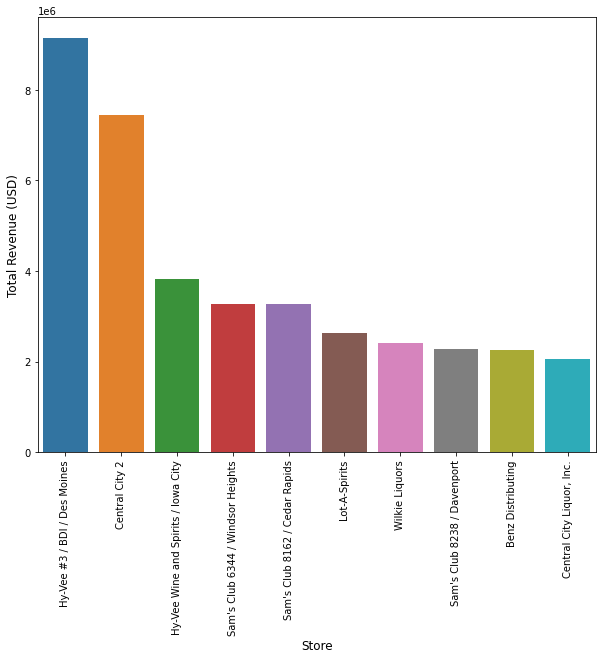

In [67]:
plt.figure(figsize=(10,8))
revenue = sns.barplot(x='store_name', y='total_revenue', data=store_revenue)

plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)

for item in revenue.get_xticklabels():
    item.set_rotation(90)


Hy-Vee #3 has the highest total revenues from 2012-2021, with the revenues of 9 Million USD. In the 10th position is Central City Liquor with total revenues of 2 Million USD. The store that has the highest total revenues shows a very big difference, with over than 4 times the revenue of the 10th position.

**Revenue of each store (Top 3) over the years**

Let's dive in more with the top 3 of the stores.

**Hy-Vee #3 / BDI / Des Moines**

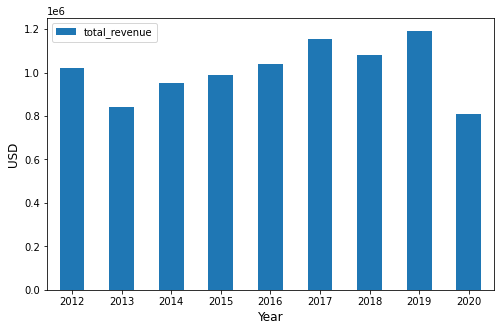

In [68]:
hyvee_des = df[(df['store_name']=='Hy-Vee #3 / BDI / Des Moines')& (df['year']!= 2021)].groupby('year').agg(
              total_revenue = ('sale_dollars', sum)
              ).plot(kind='bar', figsize=(8,5))

plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)

for item in hyvee_des.get_xticklabels():
    item.set_rotation(0)

Total revenue of Hy-Vee #3 over the years are tend to increase (except in 2020 because of the pandemic) and stays in the high values, with the lowest at around 850,000 USD.

Text(0, 0.5, 'USD')

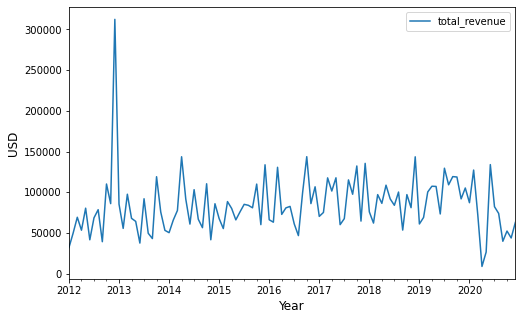

In [69]:
df[(df['store_name']=='Hy-Vee #3 / BDI / Des Moines')& (df['year']!= 2021)].groupby('month_year').agg(
              total_revenue = ('sale_dollars', sum)
              ).plot(kind='line', figsize=(8,5))

plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)

There is a really high peak in the graph on the monthly graph, let's examine on each month of the store's revenue to see if there are some errors or not.

In [70]:
df[df['month_year']== '2012-12']['bottles_sold'].sort_values(ascending=False)

1207942    15000
1825598      600
158204       600
553831       600
1867302      480
           ...  
235162         1
1148676        1
1148722        1
1150011        1
1218030        1
Name: bottles_sold, Length: 20207, dtype: int64

In [71]:
df[df['bottles_sold']==15000]

,invoice_and_item_number,date,store_number,store_name,city,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year
1207942,S09275100052,2012-12-03,2633,Hy-Vee #3 / BDI / Des Moines,des moines,polk,1062310.0,spiced rum,260.0,diageo americas,43337,Captain Morgan Spiced Rum,12,1000,11.3,16.94,15000,254100.0,15000.0,3962.58,2012,2012-12


It seems that in the December of 2012 there is a customer that bought a really high number of bottles, 15000 to be precise. It contributes to 25% of the total revenues in 2012.

**Central City 2**

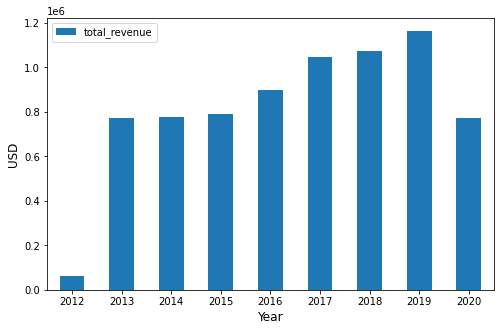

In [72]:
cc2 = df[(df['store_name']=='Central City 2')& (df['year']!= 2021)].groupby('year').agg(
              total_revenue = ('sale_dollars', sum)
              ).plot(kind='bar', figsize=(8,5))

plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)

for item in cc2.get_xticklabels():
    item.set_rotation(0)

Total revenue of Central City 2 over the years are similar to the Hy-Vee #3, but with a more steady increase (and lower revenues), except that in 2012 it really low on sales, with revenues under than 100,000 USD.

Text(0, 0.5, 'USD')

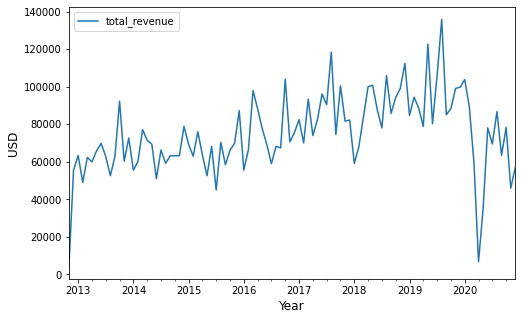

In [198]:
df[(df['store_name']=='Central City 2')& (df['year']!= 2021)].groupby('month_year').agg(
              total_revenue = ('sale_dollars', sum)
              ).plot(kind='line', figsize=(8,5))

plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)

It seems that the graph is more 'normal', there is no customer that bought a really high number of bottles. Just like with Hy-Vee #3, there is a drop in sales in the beginning of 2020.

**Hy-Vee Wine and Spirits / Iowa City**

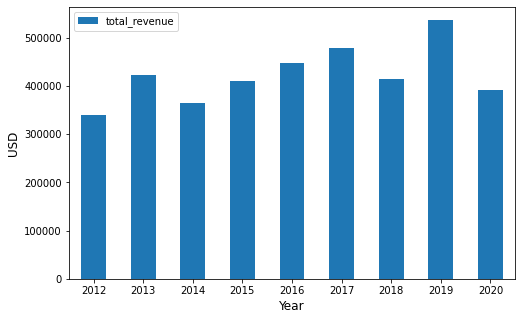

In [74]:
hyvee_iowa = df[(df['store_name']=='Hy-Vee Wine and Spirits / Iowa City')& (df['year']!= 2021)].groupby('year').agg(
              total_revenue = ('sale_dollars', sum)
              ).plot(kind='bar', figsize=(8,5))

plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)

for item in hyvee_iowa.get_xticklabels():
    item.set_rotation(0)


There is a little bit of variation in the yearly revenues. It really showed in the monthly revenues, with ups and downs that keeps happening over time. And also it is noticeably lower compared to two previous stores.



Text(0, 0.5, 'USD')

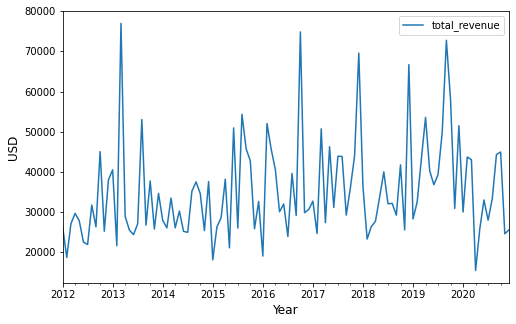

In [75]:
df[(df['store_name']=='Hy-Vee Wine and Spirits / Iowa City')& (df['year']!= 2021)].groupby('month_year').agg(
              total_revenue = ('sale_dollars', sum)
              ).plot(kind='line', figsize=(8,5))

plt.xlabel('Year', fontsize=12)
plt.ylabel('USD', fontsize=12)

**Top Selling Liquor Type** 

In [76]:
top_type = df.groupby('category_name', as_index=False).agg(
              total_revenue = ('sale_dollars', sum),
              total_bottle = ('bottles_sold', sum),
              total_volume = ('volume_sold_liters', sum)
              ).sort_values('total_revenue',ascending=False).head(10)

In [77]:
top_type

,category_name,total_revenue,total_bottle,total_volume
27,canadian whiskies,3.396936e+07,2395919,2449881.47
18,american vodkas,2.229626e+07,2430956,2286477.03
89,spiced rum,2.014081e+07,1325777,1311882.28
90,straight bourbon whiskies,1.693863e+07,935174,843052.65
100,vodka 80 proof,1.468670e+07,1831706,1805186.38
103,whiskey liqueur,1.369557e+07,1377568,779382.63
96,tennessee whiskies,1.201338e+07,540893,424545.81
24,blended whiskies,7.978291e+06,814879,764613.84
58,imported vodka,7.817235e+06,384396,372935.38
61,imported vodkas,7.131518e+06,390516,382664.58


In [78]:
df['category_name'].value_counts()

canadian whiskies                  200412
american vodkas                    159091
vodka 80 proof                     126867
straight bourbon whiskies          122053
spiced rum                         105511
                                    ...  
delisted items                          7
high proof beer - american              4
holiday vap                             4
temporary  & specialty packages         2
imported vodka - cherry                 1
Name: category_name, Length: 107, dtype: int64

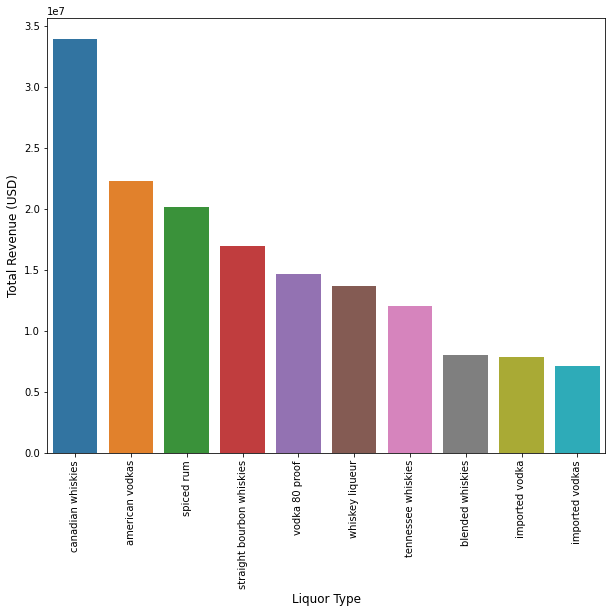

In [79]:
plt.figure(figsize=(10,8))
revenue = sns.barplot(x='category_name', y='total_revenue', data=top_type)

plt.xlabel('Liquor Type', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)

for item in revenue.get_xticklabels():
    item.set_rotation(90)


It seems that canadian whiskies is the favourite liquor of people in Iowa States with 34 Million USD in revenues and almost 2.5 million liters of volume! The second liquor is american vodka with 23 Million USD revenues and 2.2 million liters. There is a big difference in revenue of these 2 liquors, with almost 50% difference revenue.

**Top Selling Liquor Brands** 

In [194]:
top_brands = df.groupby('item_description', as_index=False).agg(
              total_revenue = ('sale_dollars', sum),
              total_bottle = ('bottles_sold', sum),
              total_volume = ('volume_sold_liters', sum),
              avg_price = ('state_bottle_retail', np.mean),
              ).sort_values('total_revenue',ascending=False).head(10)

In [195]:
top_brands

,item_description,total_revenue,total_bottle,total_volume,avg_price
820,Black Velvet,1.100051e+07,1035325,1183935.57,10.110956
6261,Titos Handmade Vodka,7.648170e+06,397422,429309.44,18.825147
1289,Captain Morgan Spiced Rum,7.581822e+06,430119,450421.67,17.407973
3348,Jack Daniels Old #7 Black Lbl,6.636048e+06,256488,243633.75,26.046069
2375,Fireball Cinnamon Whiskey,6.236022e+06,687347,387480.07,13.912654
3061,Hawkeye Vodka,5.222855e+06,749363,824397.43,7.171846
1679,Crown Royal,4.790823e+06,209605,160858.64,22.563944
1686,Crown Royal Canadian Whisky,4.559222e+06,171758,163701.67,26.066755
3409,Jameson,4.040249e+06,159659,140646.81,24.015365
3392,Jagermeister Liqueur,3.617675e+06,193832,151253.75,17.904761


In [82]:
df['item_description'].value_counts()

Black Velvet                           53240
Hawkeye Vodka                          46681
Five O'clock Vodka                     26012
Fireball Cinnamon Whiskey              25214
Jim Beam                               21529
                                       ...  
Evan Williams  Fire                        1
Ice Hole Cinnamon Schnapps                 1
Phillips Sno Shoe Grog                     1
Margaritaville Coconut Jamaican Rum        1
Ransom Old Tom Gin                         1
Name: item_description, Length: 6665, dtype: int64

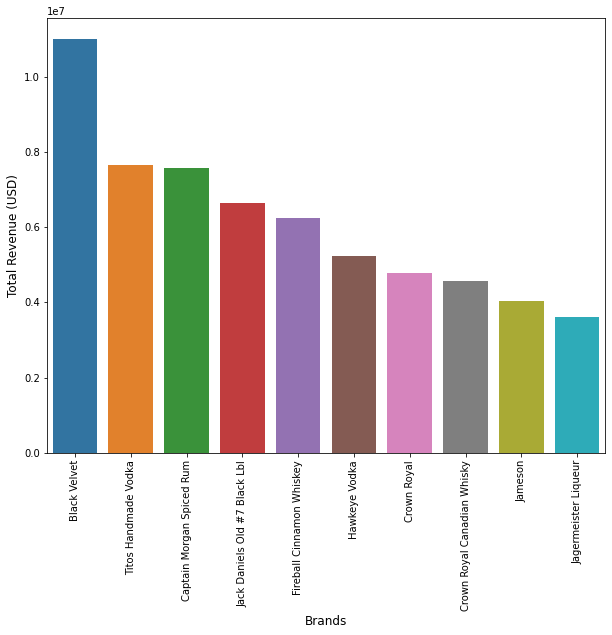

In [196]:
plt.figure(figsize=(10,8))
revenue = sns.barplot(x='item_description', y='total_revenue', data=top_brands)

plt.xlabel('Brands', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)

for item in revenue.get_xticklabels():
    item.set_rotation(90)


In [155]:
print('Average cost of Black velvet: ', df[df['item_description']=='Black Velvet'].mean()['state_bottle_retail'])
print('Average cost of Jagermeister Liqueur: ', df[df['item_description']=='Jagermeister Liqueur'].mean()['state_bottle_retail'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


Average cost of Black velvet:  10.110955672423389


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


Average cost of Jagermeister Liqueur:  17.904761427536673


For the liquor brands, Black Velvet comes as the most consumed brand, with total revenues that comes by drinking this brand is around 10 Million USD, and total volume of almost 1.2 million liters. Second and third place is close, as they don't have much difference both in total bottles, and total volume.

Black velvet becomes the most consumed liquor can't be separated by the facts that it is really cheap compared to other brands. It averages at 10.11 USD per bottle, even cheaper compared to Jagermeister Liqueur in tenth place with 17.9 USD in average. (We are using state bottle retail because it is the price that contributes to the sales)

In [197]:
print('Average price of the top selling liquor brands is USD', top_brands.mean()['avg_price']) 
print('Maximum price of the top selling liquor brands is USD', top_brands.max()['avg_price']) 
print('Minimum price of the top selling liquor brands is USD', top_brands.min()['avg_price']) 

Average price of the top selling liquor brands is USD 18.40254698012717
Maximum price of the top selling liquor brands is USD 26.066755303030263
Minimum price of the top selling liquor brands is USD 7.171845933037908


In addition to that, it seems that the average price of the top selling brands is at around USD 17.17. It means that if we want to sell a liquor that will be highly sold, it's better to sell a liquor of those brands with the range of price that are on the table.

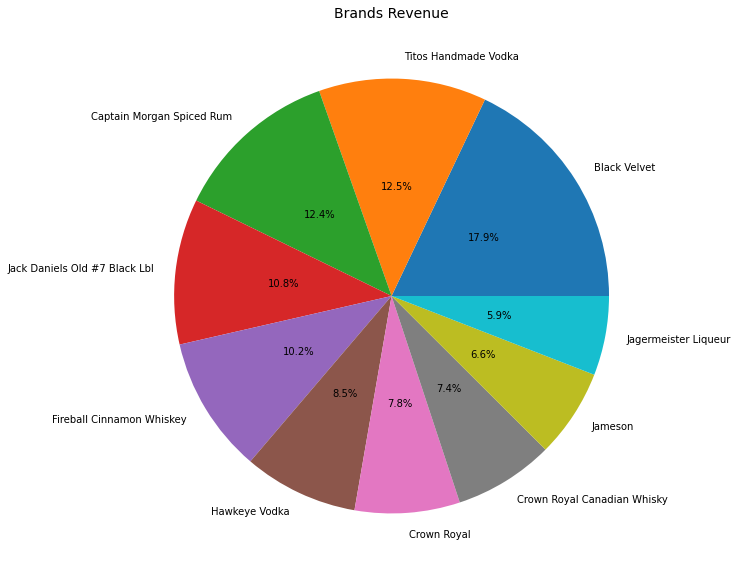

In [188]:
pie, ax = plt.subplots(figsize=[14,10])
labels = top_brands['item_description']
plt.pie(x=top_brands['total_revenue'], autopct="%.1f%%", labels=labels, pctdistance=0.5)
plt.title("Brands Revenue", fontsize=14);

From pie chart above, it looks like Black Velvet accounts about 17.9% of the top 10 most selling brands in the Iowa State, followed by Titos Handmade and Captain Morgan with 12.5% and 12.4% respectively.

**Top Liquor-Consuming Cities** 

In [85]:
top_city = df.groupby('city', as_index=False).agg(
              total_bottle = ('bottles_sold', sum),
              total_volume = ('volume_sold_liters', sum)
              ).sort_values('total_bottle',ascending=False).head(10)

In [86]:
top_city

,city,total_bottle,total_volume
109,des moines,2784862,2135798.11
63,cedar rapids,1498178,1275396.68
100,davenport,1246056,923946.20
427,waterloo,917883,628895.17
92,council bluffs,724813,606081.56
377,sioux city,708290,597300.70
438,west des moines,696268,688155.87
204,iowa city,695986,600713.74
115,dubuque,571766,524949.40
19,ames,521959,506946.78


In [87]:
df['city'].value_counts()

des moines        186276
cedar rapids      133886
davenport          89326
waterloo           65781
council bluffs     60142
                   ...  
morning sun           20
chester               17
earling               14
wyoming               12
alvord                 2
Name: city, Length: 455, dtype: int64

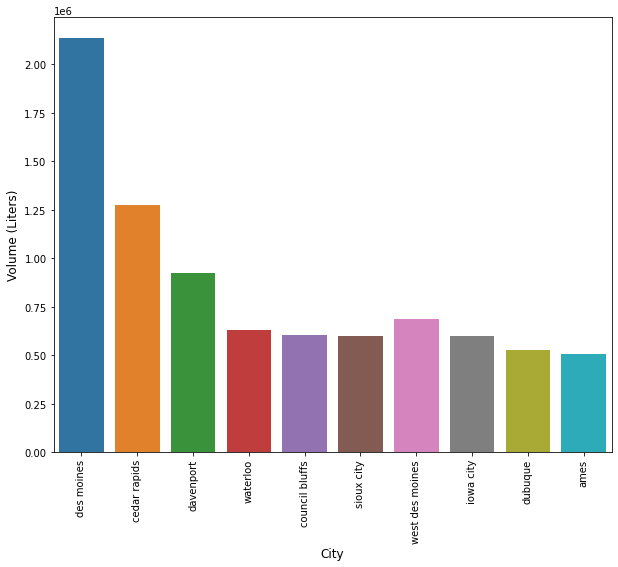

In [88]:
plt.figure(figsize=(10,8))
revenue = sns.barplot(x='city', y='total_volume', data=top_city)

plt.xlabel('City', fontsize=12)
plt.ylabel('Volume (Liters)', fontsize=12)

for item in revenue.get_xticklabels():
    item.set_rotation(90)


Des Moines people sure like to drink liquor, with more than 2.1 million of volumes consumed since 2012. And there is around 61% difference with Cedar Rapids in the second place! It makes sense that these two cities to be the city that consume the most liquor, because these cities are the two biggest and most populous cities in Iowa States respectively.

**Top Selling Vendors** 

In [89]:
top_vendor = df.groupby('vendor_name', as_index=False).agg(
              total_revenue = ('sale_dollars', sum),
              total_bottle = ('bottles_sold', sum),
              total_volume = ('volume_sold_liters', sum)
              ).sort_values('total_revenue',ascending=False).head(10)

In [90]:
top_vendor

,vendor_name,total_revenue,total_bottle,total_volume
75,diageo americas,6.022496e+07,3372027,2992402.86
149,jim beam brands,2.162336e+07,1549914,1447618.34
273,sazerac company inc,1.365572e+07,1571927,967080.72
236,pernod ricard usa,1.060300e+07,604410,479768.26
274,sazerac north america,9.591469e+06,1202121,1350088.76
237,pernod ricard usa/austin nichols,9.442422e+06,560878,461549.75
249,proximo,9.365258e+06,640926,656489.43
122,heaven hill brands,9.150352e+06,844736,809247.35
176,luxco-st louis,8.866946e+06,1119436,1200989.02
39,brown-forman corporation,8.016006e+06,410579,339376.82


In [91]:
df['vendor_name'].value_counts()

diageo americas                     347420
jim beam brands                     193548
luxco-st louis                      104632
sazerac north america                98710
heaven hill brands                   94458
                                     ...  
topa spirits                             1
high west distillery llc                 1
stanley stawski distributing co.         1
mutual wholesale liquor inc              1
h a p llc                                1
Name: vendor_name, Length: 354, dtype: int64

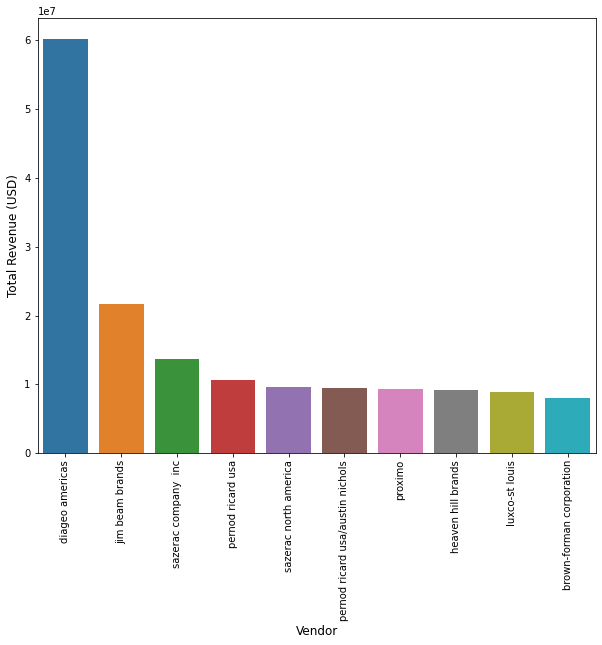

In [92]:
plt.figure(figsize=(10,8))
revenue = sns.barplot(x='vendor_name', y='total_revenue', data=top_vendor)

plt.xlabel('Vendor', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)

for item in revenue.get_xticklabels():
    item.set_rotation(90)


Diageo Americas reigns as the most profitable vendor with 60 Million USD in revenue, almost 3 times of Jim Beam Brands the second place! Starting from third untul tenth place, it is not really much of a difference in total revenue.

**Top Selling Brands per Store** 

In [93]:
top_sb = df.groupby(['store_name', 'item_description'], as_index=False).agg(
              total_revenue = ('sale_dollars', sum),
              total_bottle = ('bottles_sold', sum),
              total_volume = ('volume_sold_liters', sum)
              ).sort_values('total_revenue', ascending=False)

In [94]:
top_sb.head(20)

,store_name,item_description,total_revenue,total_bottle,total_volume
164437,Hy-Vee #3 / BDI / Des Moines,Captain Morgan Spiced Rum,709939.74,40717,40959.37
164721,Hy-Vee #3 / BDI / Des Moines,Fireball Cinnamon Whiskey,428475.38,22231,28823.50
164936,Hy-Vee #3 / BDI / Des Moines,Jack Daniels Old #7 Black Lbl,412070.31,15085,15147.20
76370,Costco Wholesale #788 / WDM,Kirkland Signature American Vodka,375167.16,30306,53035.50
63586,Central City 2,Jameson,343513.56,11940,12099.00
64150,Central City 2,Titos Handmade Vodka,339058.59,17993,18180.75
164945,Hy-Vee #3 / BDI / Des Moines,Jameson,316768.59,11152,11179.00
165004,Hy-Vee #3 / BDI / Des Moines,Juarez Tequila Gold,298033.26,27975,27977.25
63420,Central City 2,Fireball Cinnamon Whiskey,297282.51,15337,19980.75
165680,Hy-Vee #3 / BDI / Des Moines,Titos Handmade Vodka,296306.07,15765,15903.75


In [95]:
top_store = top_sb.groupby('store_name', as_index=False).agg(
              total_revenue = ('total_revenue', max),
              ).sort_values('total_revenue', ascending=False)

In [96]:
top_store = top_store.merge(top_sb, on='total_revenue')

In [97]:
top_store_brand = top_store[['store_name_x','item_description', 'total_revenue', 'total_bottle', 'total_volume']].rename(
                  columns={'store_name_x':'store_name'}).head(10)

In [98]:
top_store_brand

,store_name,item_description,total_revenue,total_bottle,total_volume
0,Hy-Vee #3 / BDI / Des Moines,Captain Morgan Spiced Rum,709939.74,40717,40959.37
1,Costco Wholesale #788 / WDM,Kirkland Signature American Vodka,375167.16,30306,53035.50
2,Central City 2,Jameson,343513.56,11940,12099.00
3,Sam's Club 6344 / Windsor Heights,Crown Royal Canadian Whisky,227669.88,7908,8304.00
4,Hy-Vee Wine and Spirits / Iowa City,Jameson,170894.40,6420,6238.22
5,Sam's Club 8162 / Cedar Rapids,Jack Daniels Old #7 Black Lbl,147928.47,4581,5701.50
6,Wilkie Liquors,Juarez Gold Dss,139526.40,18908,18908.00
7,Lot-A-Spirits,Captain Morgan Spiced Rum,139424.16,7938,7987.50
8,Benz Distributing,Captain Morgan Spiced Rum,127686.48,7230,7324.50
9,Hy-Vee Food Store / Carroll,Black Velvet,115281.13,8975,12552.36


Table above shows top brands of each store. For Hy-Vee #3, its most bought brand is Captain Morgan Spiced Rum, and so on. As we can see, Captain Morgan appears three times in the list, and Jameson appears two times. It shows that those two brands are really popular, in fact, the two brands placed in third and ninth position in the most bought liquor brands.

In [99]:
store_revenue

,store_name,total_revenue,total_bottle,total_volume
1268,Hy-Vee #3 / BDI / Des Moines,9138336.24,555127,540819.20
806,Central City 2,7439069.39,433713,416208.10
1452,Hy-Vee Wine and Spirits / Iowa City,3831545.78,259629,243446.43
2163,Sam's Club 6344 / Windsor Heights,3272211.13,186685,227762.75
2169,Sam's Club 8162 / Cedar Rapids,3272144.80,199847,229530.20
1858,Lot-A-Spirits,2629519.33,154161,147806.23
2625,Wilkie Liquors,2417412.36,165632,163982.92
2170,Sam's Club 8238 / Davenport,2287100.70,136107,157291.75
86,Benz Distributing,2246068.25,128474,122138.78
807,"Central City Liquor, Inc.",2063768.58,136435,101889.93


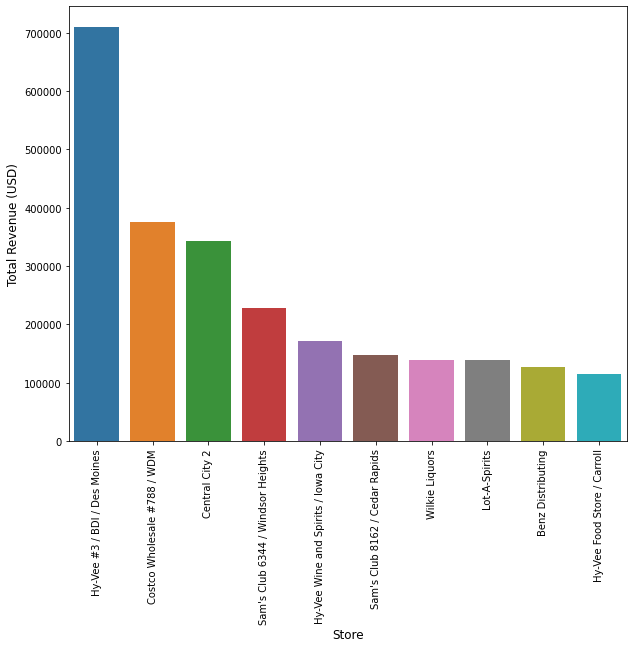

In [100]:
plt.figure(figsize=(10,8))
revenue = sns.barplot(x='store_name', y='total_revenue', data=top_store_brand)

plt.xlabel('Store', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)

for item in revenue.get_xticklabels():
    item.set_rotation(90)


There is something interesting based on the top_store_brand table, Costco Wholesale #788 / WDM, that placed second on the list doesn't even placed in the top 10 of the store highest selling revenue. It is the same for its corresponding products, Kirkland Signature American Vodka, it's not in the list of the top 10 most bought brands.

Let's explore that a little bit.

In [101]:
df[df['item_description']=='Kirkland Signature American Vodka'].value_counts()

invoice_and_item_number  date        store_number  store_name                           city             county   category   category_name    vendor_number  vendor_name          item_number  item_description                   pack  bottle_volume_ml  state_bottle_cost  state_bottle_retail  bottles_sold  sale_dollars  volume_sold_liters  volume_sold_gallons  year  month_year
INV-33770400002          2021-01-26  3814          Costco Wholesale #788 / WDM          west des moines  dallas   1031100.0  american vodkas  803.0          levecke corporation  936600       Kirkland Signature American Vodka  6     1750              8.34               12.51                2970          37154.70      5197.5              1373.03              2021  2021-01       1
INV-33364800002          2021-01-12  3814          Costco Wholesale #788 / WDM          west des moines  dallas   1031100.0  american vodkas  803.0          levecke corporation  936600       Kirkland Signature American Vodka  6     1750       

In [102]:
df['item_description'].value_counts()['Kirkland Signature American Vodka']

20

In [103]:
df['item_description'].value_counts()['Captain Morgan Spiced Rum']

21360

In [104]:
df['item_description'].value_counts()['Jameson']

12301

It seems that *Kirkland Signature American Vodka* is specialty of *Costco #788 Store*, with there are only 20 recorded transactions, too few compared to *Captain Morgan Spiced Rum* and *Jameson* that placed first and third (with more than 10000 transactions)

In [105]:
df['bottles_sold'].sort_values(ascending=False).head(20)

1207942    15000
793997      4050
62087       3960
1077214     3510
906330      3510
62570       2970
62395       2970
1053287     2970
906772      2970
1170996     2940
905515      2700
1886753     2700
61540       2700
1150985     2640
890764      2508
569341      2430
2017078     2400
382681      2310
224842      2220
174816      2160
Name: bottles_sold, dtype: int64

In [106]:
df[(df['store_name']=='Costco Wholesale #788 / WDM') & (df['item_description']=='Kirkland Signature American Vodka')].mean()['bottles_sold']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


2331.230769230769

If we look closely, it can be seen that people that bought *Kirkland Signature American Vodka* always bought with a massive amount with the average bottles sold were 2330 bottles (**Placed in the top 20 of the highest number of bottles sold, with just around 20 transactions!**)

### Spatial Analysis

We want to show the distribution of the stores spatially in a map, so it can gives more of a sense to imagine.

**Install the needed libraries**

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 11.2MB/s 
     |████████████████████████████████| 6.5MB 19.1MB/s 
     |████████████████████████████████| 14.8MB 271kB/s 


In [ ]:
!pip install contextily

     |████████████████████████████████| 19.1MB 1.2MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
from shapely import wkt

In [ ]:
import contextily as ctx

In [ ]:
df_location = df_location.rename(columns={'store_location':'geometry'})

In [ ]:
df_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 2040891
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  1998 non-null   object        
 1   date                     1998 non-null   datetime64[ns]
 2   store_number             1998 non-null   int64         
 3   store_name               1998 non-null   object        
 4   city                     1998 non-null   object        
 5   geometry                 1997 non-null   object        
 6   county                   1998 non-null   object        
 7   category                 1998 non-null   float64       
 8   category_name            1998 non-null   object        
 9   vendor_number            1998 non-null   float64       
 10  vendor_name              1998 non-null   object        
 11  item_number              1998 non-null   int64         
 12  item_description         1998 n

In [ ]:
def wkt_loads(x):
    try:
        return wkt.loads(x)
    except Exception:
        return None

In [ ]:
df_location['geometry'] = df_location['geometry'].apply(wkt_loads)

In [ ]:
df_loc = gpd.GeoDataFrame(df_location, geometry='geometry', crs='EPSG:4326')

In [ ]:
df_loc = df_loc[['store_name', 'geometry', 'lon', 'lat']]

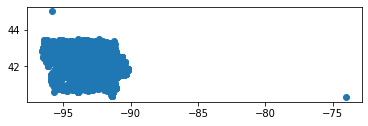

In [ ]:
df_loc.plot()

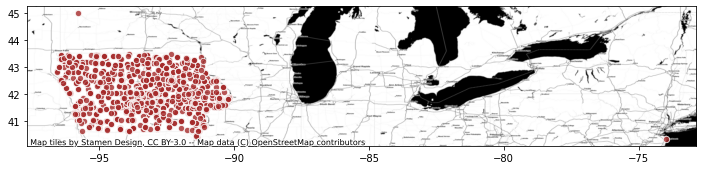

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
df_loc.plot(ax=axes, figsize=(12,12), markersize=40, color='brown',
                           edgecolor='white', alpha=0.8, marker='o')
ctx.add_basemap(ax=axes, crs=df_loc.crs, source=ctx.providers.Stamen.Toner)

In [ ]:
df_loc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

There are outliers, it seems that there were errors when assigning this liquor data by Iowa states. It's better to remove it.

In [ ]:
df_loc['lon']=df_loc['geometry'].x
df_loc['lat']=df_loc['geometry'].y

In [ ]:
df_loc['lon'].max()

-73.982421

In [ ]:
df_loc[df_loc['lon']==-73.982421]

,invoice_and_item_number,date,store_number,store_name,city,geometry,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year,lon,lat
64961,INV-30834200004,2020-10-07,5876,'Da Booze Barn / West Bend,west bend,POINT (-73.98242 40.30523),palo alto,1031100.0,american vodkas,301.0,fifth generation inc,38178,Titos Handmade Vodka,6,1750,19.0,28.5,6,171.0,10.5,2.77,2020,2020-10,-73.982421,40.305231


In [ ]:
df_loc['lat'].max()

45.009612

In [ ]:
df_loc[df_loc['lat']==45.009612]

,invoice_and_item_number,date,store_number,store_name,city,geometry,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year,lon,lat
13619,INV-16781700002,2019-01-07,4722,Walgreens #09476 / Burlington,burlington,POINT (-95.79728 45.00961),des moines,1081100.0,coffee liqueurs,370.0,pernod ricard usa,67526,Kahlua Coffee,12,750,12.49,18.74,12,224.88,9.0,2.37,2019,2019-01,-95.79728,45.009612


In [ ]:
df_loc = df_loc[(df_loc['lon']!=-73.982421) & (df_loc['lat']!=45.009612)]

Let's plot it again

In [ ]:
df_loc[df_loc.isnull()['geometry']==True]

,invoice_and_item_number,date,store_number,store_name,city,geometry,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month_year,lon,lat
13,S17579900021,2014-02-25,4136,Fareway Stores #983 / Grimes,grimes,None,polk,1012300.0,irish whiskies,370.0,pernod ricard usa/austin nichols,15626,Jameson,12,750,13.74,20.99,36,755.64,27.0,7.13,2014,2014-02,NaN,NaN


There is one null value in geometry column, let's just drop it (It's practically the same, because we just want to see the rough distribution of the liquor store)

In [ ]:
df_loc=df_loc.dropna()

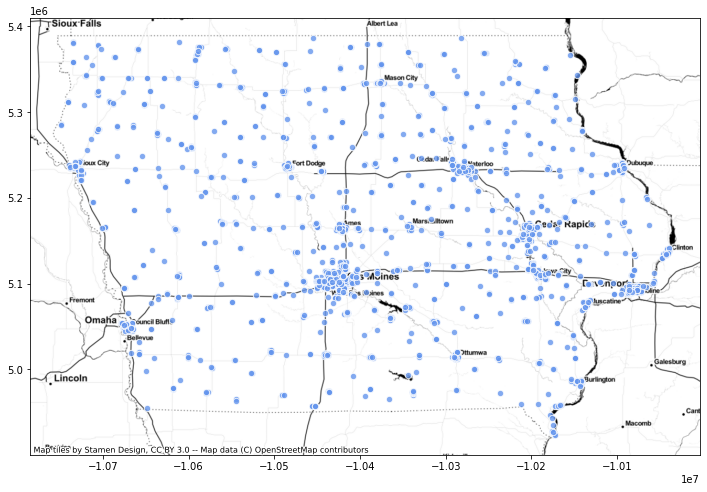

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
df_loc.to_crs(epsg=3857).plot(ax=axes, figsize=(12,12), markersize=40, color='cornflowerblue',
                           edgecolor='white', alpha=0.8, marker='o')
ctx.add_basemap(ax=axes, source=ctx.providers.Stamen.Toner)

Based on the map above, it can be seen that the stores are distributed equally in the Iowa State, with some of concentrations in the centre and right, which are in Des Moines and Cedar Rapids City.



Let's change the basemap so it can give more sense to why Des Moines and Cedar Rapids have a really high concentration of liquor stores.

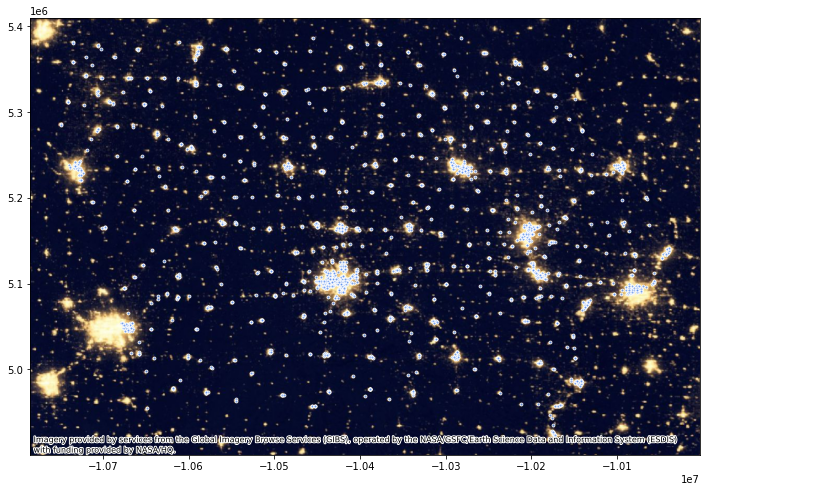

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
df_loc.to_crs(epsg=3857).plot(ax=axes, figsize=(12,12), markersize=8, color='cornflowerblue',
                           edgecolor='white', alpha=0.8, marker='o')
ctx.add_basemap(ax=axes, source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012)

It's much clearer to see with the night image. Bright area is a sign of lights that are turned on in the night time, the bigger the bright area, the more people that are in that area. We can see based on this map, the most concentrated liquor stores are in the center (Des Moines) and also a bit to the right (Cedar Rapids), it corresponds to the light intensity in those two areas being one of the brightest area, along with Waterloo and Davenport City. It's also nice to see that most of the stores are located in the city (showed by the light).

**Plot the top 10 of the stores that has the total revenues**

Get the coordinates of stores with top 10 of total revenues.

In [ ]:
df_store_loc = df_loc.merge(store_revenue, on='store_name').drop(['lon', 'lat'], axis=1).sort_values('total_revenue', ascending=False)

In [ ]:
df_store = df_store_loc.drop_duplicates(subset=['store_name'])

In [ ]:
df_store

,store_name,geometry,total_revenue,total_bottle,total_volume
3,Hy-Vee #3 / BDI / Des Moines,POINT (-93.59675 41.55410),9138336.24,555127,540819.20
2,Central City 2,POINT (-93.61374 41.60572),7439069.39,433713,416208.10
9,Hy-Vee Wine and Spirits / Iowa City,POINT (-91.53046 41.64276),3831545.78,259629,243446.43
0,Sam's Club 6344 / Windsor Heights,POINT (-93.71803 41.59917),3272211.13,186685,227762.75
5,Sam's Club 8162 / Cedar Rapids,POINT (-91.67969 42.03182),3272144.80,199847,229530.20
10,Lot-A-Spirits,POINT (-90.48065 41.52965),2629519.33,154161,147806.23
7,Wilkie Liquors,POINT (-91.41040 41.91833),2417412.36,165632,163982.92
4,Sam's Club 8238 / Davenport,POINT (-90.52708 41.55973),2287100.70,136107,157291.75
1,Benz Distributing,POINT (-91.65987 41.97574),2246068.25,128474,122138.78
6,"Central City Liquor, Inc.",POINT (-93.61979 41.60566),2063768.58,136435,101889.93


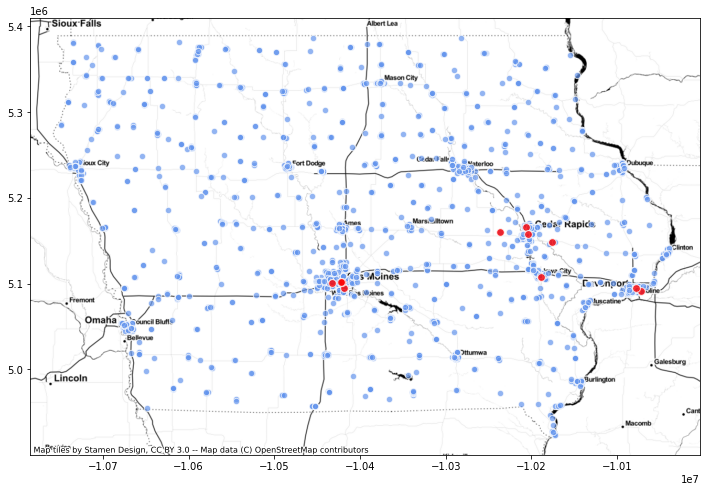

In [ ]:
fig, axes = plt.subplots(figsize=(12,10))
df_loc.to_crs(epsg=3857).plot(ax=axes, figsize=(12,12), markersize=40, color='cornflowerblue',
                           edgecolor='white', alpha=0.7, marker='o')
df_store_loc.to_crs(epsg=3857).plot(ax=axes, figsize=(12,12), markersize=60, color='red',
                           edgecolor='white', alpha=0.8, marker='o')
ctx.add_basemap(ax=axes, source=ctx.providers.Stamen.Toner)

Top 10 of the stores with the highest total revenue are concentrated in around 3 cities (Des Moines, Cedar Rapids, and Davenport). It makes sense that stores with the highest total revenue are located in those cities, as Des Moines is the capital city and the most populous city in Iowa State [(link)](https://en.wikipedia.org/wiki/Des_Moines,_Iowa), Cedar Rapids is the second largest city in Iowa State [(link)](https://en.wikipedia.org/wiki/Cedar_Rapids,_Iowa), meanwhile Davenport is the city that becomes a border city between Iowa and Illinois State [(link)](https://en.wikipedia.org/wiki/Davenport,_Iowa).

## Thank you for reading! I hope it is useful.